Health Trend Analysis using time series analysis techniques, including data loading, preprocessing, visualization, decomposition, and forecasting using SARIMA

In [1]:
import pandas as pd

# Load your preprocessed data into a DataFrame
# Assuming 'preprocessed_data' is your DataFrame containing the user data
# Adjust the file path accordingly
file_path = '/University/6th Semester/Sixth Semester/AI-Enhanced-Fitness-Wellness-Analyzer-Project/Data/MergedPreprocessedData/PartiallyProcessedData05.csv'
preprocessed_data = pd.read_csv(file_path)

# Convert 'ActivityDate' to datetime for time series analysis
preprocessed_data['ActivityDate'] = pd.to_datetime(preprocessed_data['ActivityDate'])


C:\Users\intag\AppData\Local\Temp\ipykernel_6800\3440273838.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  preprocessed_data['ActivityDate'] = pd.to_datetime(preprocessed_data['ActivityDate'])


In [2]:
# Setting 'ActivityDate' as the index
preprocessed_data.set_index('ActivityDate', inplace=True)

Exploring and Visualizing the Time Series Data:
Plotting time series graphs to visualize trends and patterns.

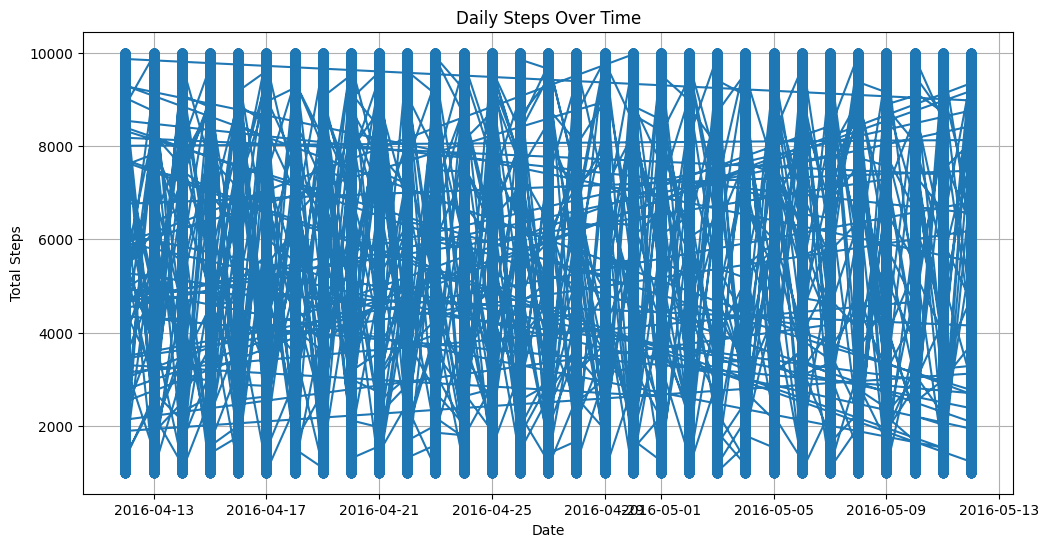

In [3]:
import matplotlib.pyplot as plt

# Plot daily steps over time
plt.figure(figsize=(12, 6))
plt.plot(preprocessed_data['TotalSteps'], marker='o', linestyle='-')
plt.title('Daily Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.grid(True)
plt.show()

Time Series Decomposition:\
Decompose the time series data into its components (trend, seasonality, residual) using methods like seasonal decomposition of time series (STL).

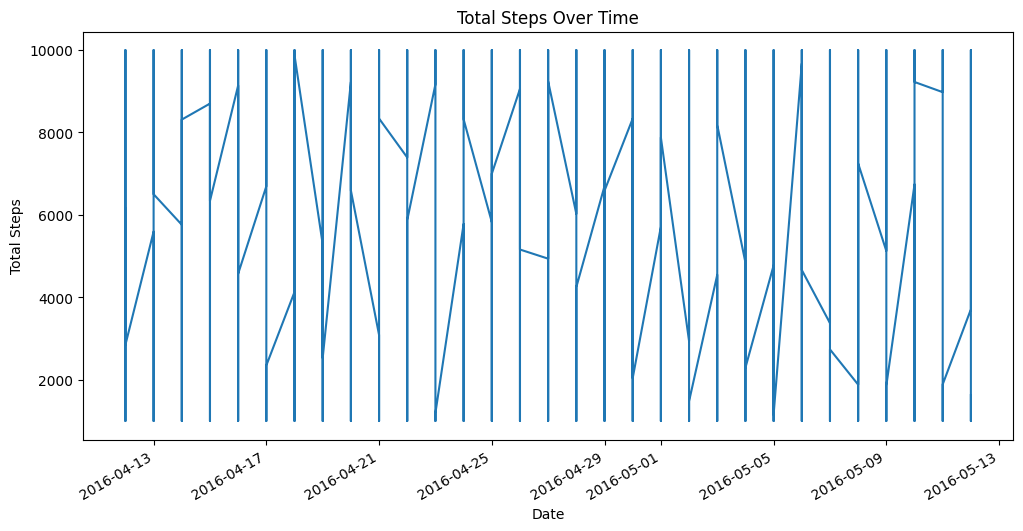

In [4]:
from statsmodels.tsa.seasonal import STL

# Decompose the time series
preprocessed_data['TotalSteps'].plot(figsize=(12, 6))
plt.title('Total Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.show()

In [14]:
stl_result = STL(preprocessed_data['TotalSteps'], seasonal=7).fit()  # or seasonal=30, etc.

ValueError: Unable to determine period from endog

In [5]:
weekly_data = preprocessed_data['TotalSteps'].resample('W').mean()  # Resample to weekly frequency
stl_result = STL(weekly_data).fit()

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(preprocessed_data['TotalSteps'], lags=50)
plt.show()


Time Series Modeling:\
Depending on the identified trends and patterns, you can use time series modeling techniques such as autoregressive integrated moving average (ARIMA) or seasonal-trend decomposition using LOESS (STL) for forecasting.

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example: Fit SARIMA model for daily steps
sarima_model = SARIMAX(preprocessed_data['TotalSteps'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_result = sarima_model.fit(disp=False)
forecast = sarima_result.get_forecast(steps=30)  # Adjust the number of forecasted steps as needed
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(preprocessed_data['TotalSteps'], label='Actual Steps')
plt.plot(forecast.predicted_mean, color='red', label='Forecasted Steps')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.2)
plt.title('Daily Steps Forecast with SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\intag\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\intag\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\intag\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\intag\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

KeyboardInterrupt: 